# Importing necessary libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.compose import make_column_selector as selector
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import warnings
warnings.filterwarnings('ignore')

# Load the dataset


In [32]:
df = pd.read_csv('final(2).csv')

In [33]:
df.head()

,Time,Protcol,Flag,Family,Clusters,SeddAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,50,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,500,5,A,Bonet,5061,SS
1,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
2,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
3,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
4,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS


# Information

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Time           149043 non-null  int64 
 1   Protcol        149043 non-null  object
 2   Flag           149043 non-null  object
 3   Family         149043 non-null  object
 4   Clusters       149043 non-null  int64 
 5   SeddAddress    149043 non-null  object
 6   ExpAddress     149043 non-null  object
 7   BTC            149043 non-null  int64 
 8   USD            149043 non-null  int64 
 9   Netflow_Bytes  149043 non-null  int64 
 10  IPaddress      149043 non-null  object
 11  Threats        149043 non-null  object
 12  Port           149043 non-null  int64 
 13  Prediction     149043 non-null  object
dtypes: int64(6), object(8)
memory usage: 15.9+ MB


In [35]:
df.describe()

,Time,Clusters,BTC,USD,Netflow_Bytes,Port
count,149043.000000,149043.000000,149043.000000,149043.000000,149043.000000,149043.000000
mean,21.466979,2.349295,30.554605,14863.441114,2021.278651,5063.949967
std,15.883598,2.828759,101.447102,26849.434659,2271.420987,2.696011
min,-10.000000,1.000000,1.000000,1.000000,1.000000,5061.000000
25%,8.000000,1.000000,8.000000,512.000000,353.000000,5062.000000
50%,19.000000,1.000000,13.000000,4321.000000,1031.000000,5062.000000
75%,32.000000,2.000000,22.000000,18454.000000,3188.000000,5066.000000
max,96.000000,12.000000,1980.000000,126379.000000,12360.000000,5068.000000


# Checking null values

In [36]:
df.isnull().sum()

Time             0
Protcol          0
Flag             0
Family           0
Clusters         0
SeddAddress      0
ExpAddress       0
BTC              0
USD              0
Netflow_Bytes    0
IPaddress        0
Threats          0
Port             0
Prediction       0
dtype: int64

# Detect and remove outliers using Z-score

In [37]:
from scipy.stats import zscore
numeric_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(df[numeric_cols].apply(zscore))
df_cleaned = df[(z_scores < 3).all(axis=1)]
print("Original dataset size: ", df.shape)
print("Dataset size after outlier removal: ", df_cleaned.shape)

Original dataset size:  (149043, 14)
Dataset size after outlier removal:  (132305, 14)


# Data Visualizations


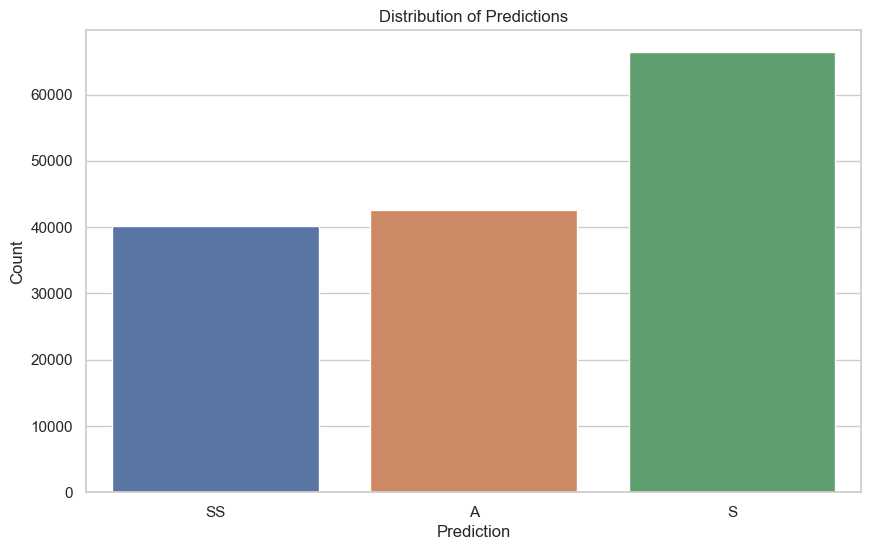

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Prediction', data=df)
plt.title('Distribution of Predictions')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.show()

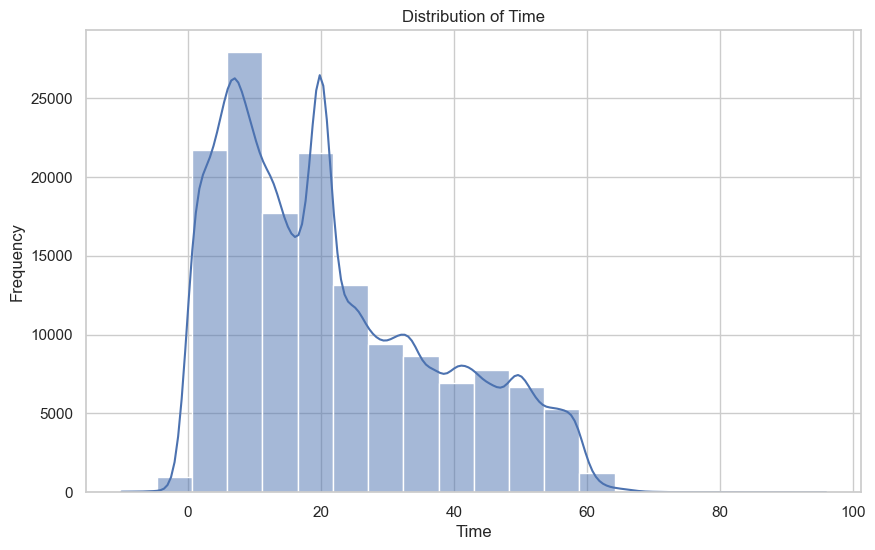

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=20, kde=True)
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

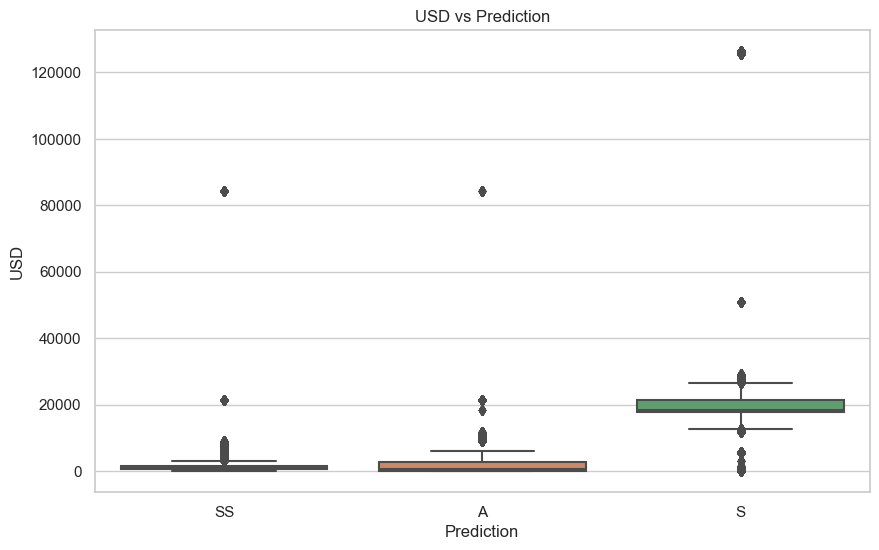

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Prediction', y='USD', data=df)
plt.title('USD vs Prediction')
plt.xlabel('Prediction')
plt.ylabel('USD')
plt.show()

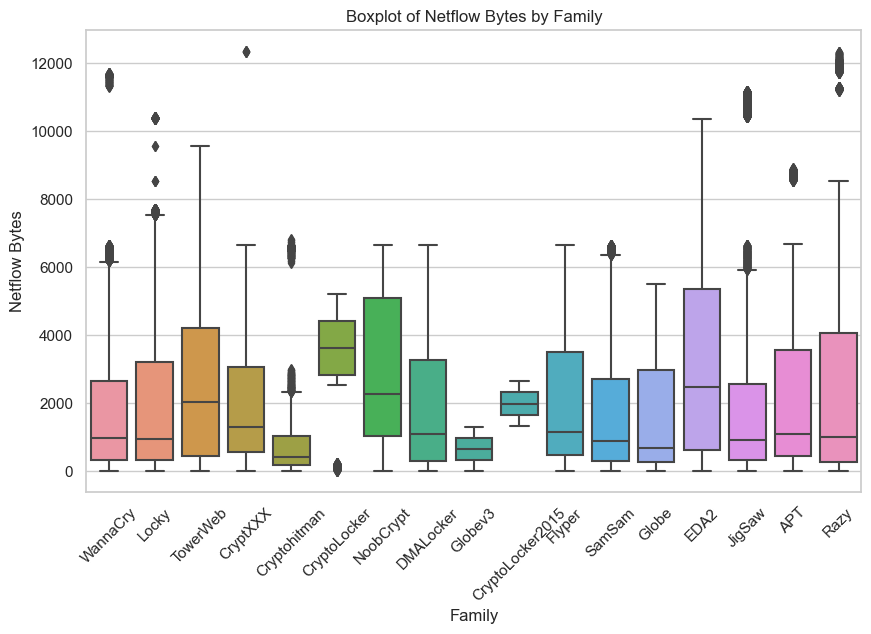

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Family', y='Netflow_Bytes', data=df)
plt.title('Boxplot of Netflow Bytes by Family')
plt.xlabel('Family')
plt.ylabel('Netflow Bytes')
plt.xticks(rotation=45)
plt.show()


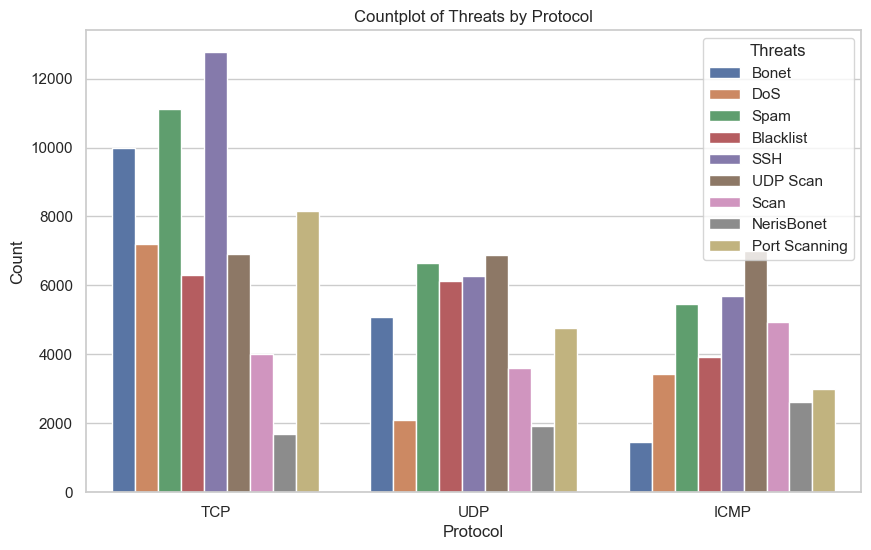

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Protcol', hue='Threats', data=df)
plt.title('Countplot of Threats by Protocol')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.show()


# Encoding categorical variables


In [45]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoders = {}
for column in ['Protcol', 'Flag', 'Family', 'SeddAddress', 'ExpAddress', 'IPaddress', 'Threats', 'Prediction']:
    label_encoders[column] = LabelEncoder()
    df_cleaned[column] = label_encoders[column].fit_transform(df_cleaned[column])

# Prepare data for machine learning models


In [46]:
X = df_cleaned.drop(['Prediction'], axis=1)
y = df_cleaned['Prediction']

# Split data into train and test sets


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data


In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Machine Learning Models

In [61]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")
# Generate classification report
rf_class_report = classification_report(y_test, rf_pred)
print("Classification Report:\n", rf_class_report)
# Generate confusion matrix
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 0.9946714031971581
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7661
           1       0.99      0.99      0.99     11286
           2       1.00      1.00      1.00      7514

    accuracy                           0.99     26461
   macro avg       0.99      0.99      0.99     26461
weighted avg       0.99      0.99      0.99     26461

Confusion Matrix:
 [[ 7612    39    10]
 [   48 11215    23]
 [    0    21  7493]]


In [60]:
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy}")
# Generate classification report
knn_class_report = classification_report(y_test, knn_pred)
print("Classification Report:\n", knn_class_report)
# Generate confusion matrix
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
print("Confusion Matrix:\n", knn_conf_matrix)

KNN Accuracy: 0.9808019349230944
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      7661
           1       0.98      0.98      0.98     11286
           2       0.99      0.99      0.99      7514

    accuracy                           0.98     26461
   macro avg       0.98      0.98      0.98     26461
weighted avg       0.98      0.98      0.98     26461

Confusion Matrix:
 [[ 7454   165    42]
 [  222 11040    24]
 [   30    25  7459]]


In [59]:
from sklearn.naive_bayes import GaussianNB
# Gaussian Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Gaussian NB Accuracy: {nb_accuracy}")
# Generate classification report
nb_class_report = classification_report(y_test, nb_pred)
print("Classification Report:\n", nb_class_report)
# Generate confusion matrix
nb_conf_matrix = confusion_matrix(y_test, nb_pred)
print("Confusion Matrix:\n", nb_conf_matrix)

Gaussian NB Accuracy: 0.7611957220059711
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.60      0.66      7661
           1       0.87      0.84      0.86     11286
           2       0.65      0.80      0.72      7514

    accuracy                           0.76     26461
   macro avg       0.75      0.75      0.75     26461
weighted avg       0.77      0.76      0.76     26461

Confusion Matrix:
 [[4602  984 2075]
 [ 564 9529 1193]
 [1044  459 6011]]


In [57]:
# Multi-layer Perceptron Classifier
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print(f"MLP Accuracy: {mlp_accuracy}")

MLP Accuracy: 0.9801594799894184


In [58]:
# Generate classification report
mlp_class_report = classification_report(y_test, mlp_pred)
print("Classification Report:\n", mlp_class_report)
# Generate confusion matrix
mlp_conf_matrix = confusion_matrix(y_test, mlp_pred)
print("Confusion Matrix:\n", mlp_conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      7661
           1       0.98      0.98      0.98     11286
           2       0.99      0.99      0.99      7514

    accuracy                           0.98     26461
   macro avg       0.98      0.98      0.98     26461
weighted avg       0.98      0.98      0.98     26461

Confusion Matrix:
 [[ 7437   197    27]
 [  194 11071    21]
 [   53    33  7428]]


In [62]:
from sklearn.tree import DecisionTreeClassifier
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
# Make predictions
dt_pred = dt_model.predict(X_test)
# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}")
# Generate classification report
dt_class_report = classification_report(y_test, dt_pred)
print("Classification Report:\n", dt_class_report)
# Generate confusion matrix
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
print("Confusion Matrix:\n", dt_conf_matrix)

Decision Tree Accuracy: 0.9949359434639659
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7661
           1       0.99      0.99      0.99     11286
           2       1.00      1.00      1.00      7514

    accuracy                           0.99     26461
   macro avg       0.99      1.00      1.00     26461
weighted avg       0.99      0.99      0.99     26461

Confusion Matrix:
 [[ 7622    32     7]
 [   54 11218    14]
 [    1    26  7487]]


# CNN Model

In [65]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# Ensure X_train and X_test are NumPy arrays
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')  # Use np.unique(y_train) for the number of classes
])
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Set early stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
# Train the model
history = model.fit(X_train_cnn, y_train, epochs=10, validation_data=(X_test_cnn, y_test), callbacks=[early_stopping])

Epoch 1/10
3308/3308 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.9128 - loss: 0.2336 - val_accuracy: 0.9670 - val_loss: 0.0908
Epoch 2/10
3308/3308 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.9661 - loss: 0.0836 - val_accuracy: 0.9748 - val_loss: 0.0624
Epoch 3/10
3308/3308 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9706 - loss: 0.0687 - val_accuracy: 0.9749 - val_loss: 0.0598
Epoch 4/10
3308/3308 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - accuracy: 0.9746 - loss: 0.0596 - val_accuracy: 0.9759 - val_loss: 0.0566
Epoch 5/10
3308/3308 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.9771 - loss: 0.0538 - val_accuracy: 0.9794 - val_loss: 0.0472
Epoch 6/10
3308/3308 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.9782 - loss: 0.0495 - val_accuracy: 0.9775 - val_loss: 0.0521
Epoch 7/10
3308/3308 ━━━━━━━━━━━━━━━━━━━━ 49s 13ms/step - accuracy: 0.9799 - loss: 0.0463 - val_accuracy: 0.9782 - val_loss: 0.0494
Epoch 8/10
3308/3308 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - accuracy: 0.9809 - 

In [66]:
# Predict using CNN model
cnn_pred_prob = model.predict(X_test_cnn)
cnn_pred = np.argmax(cnn_pred_prob, axis=1)
# Calculate accuracy
cnn_accuracy = accuracy_score(y_test, cnn_pred)
print(f"CNN Accuracy: {cnn_accuracy}")
# Generate classification report
cnn_class_report = classification_report(y_test, cnn_pred)
print("Classification Report:\n", cnn_class_report)
# Generate confusion matrix
cnn_conf_matrix = confusion_matrix(y_test, cnn_pred)
print("Confusion Matrix:\n", cnn_conf_matrix)

827/827 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
CNN Accuracy: 0.9820868447904463
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      7661
           1       0.99      0.98      0.98     11286
           2       0.99      1.00      0.99      7514

    accuracy                           0.98     26461
   macro avg       0.98      0.98      0.98     26461
weighted avg       0.98      0.98      0.98     26461

Confusion Matrix:
 [[ 7461   123    77]
 [  218 11038    30]
 [   10    16  7488]]


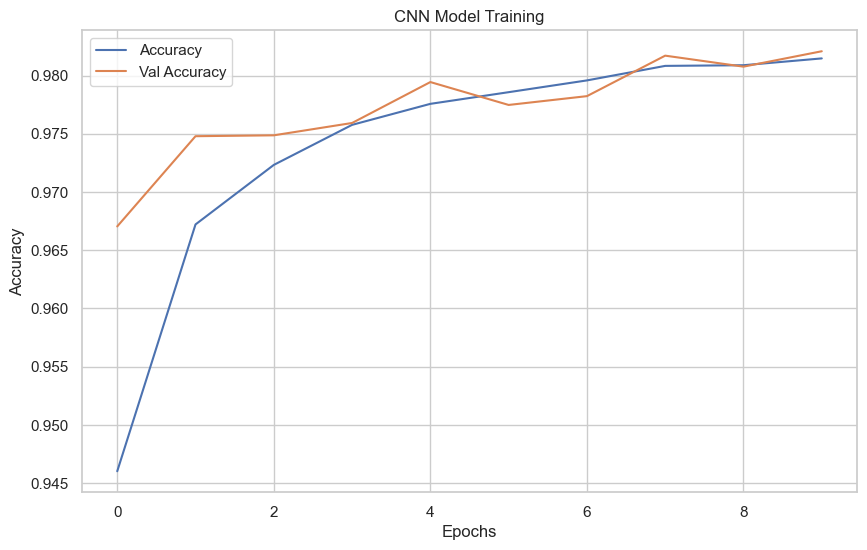

In [67]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('CNN Model Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model Comparison

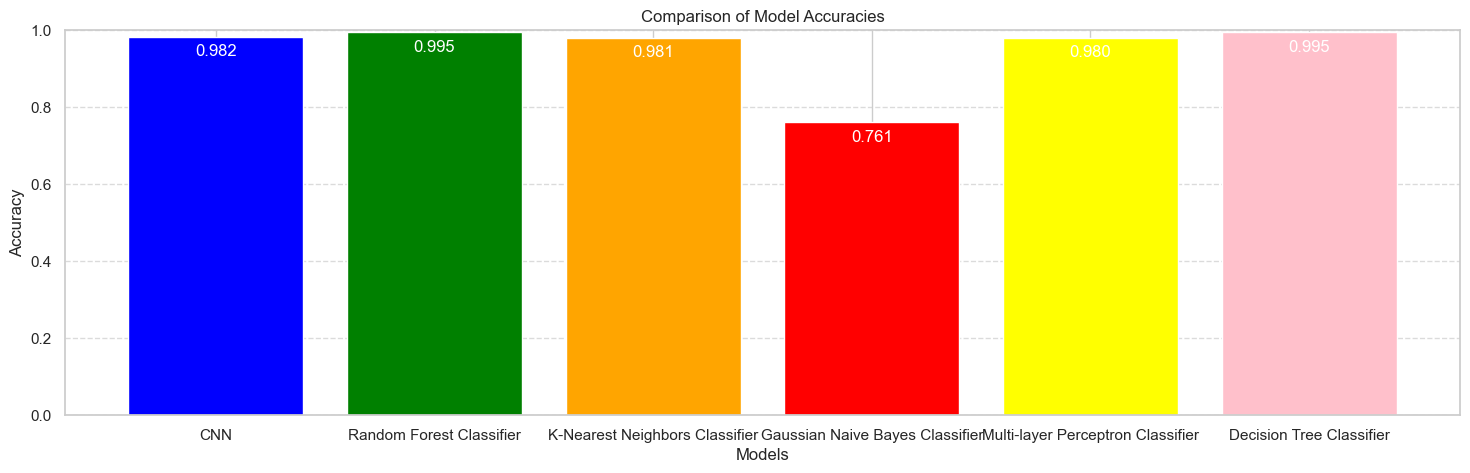

In [74]:
# Define the accuracies obtained from  models
accuracies = [cnn_accuracy, rf_accuracy, knn_accuracy, nb_accuracy, mlp_accuracy, dt_accuracy]

# Define the models
models = ['CNN', 'Random Forest Classifier', 'K-Nearest Neighbors Classifier', 
          'Gaussian Naive Bayes Classifier', 'Multi-layer Perceptron Classifier', 
          'Decision Tree Classifier']

# Plotting
plt.figure(figsize=(18, 5))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'yellow', 'pink'])

# Adding the accuracy values on top of the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{accuracy:.3f}', ha='center', color='white', fontsize=12)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.0, 1.0)  # Adjust the y-axis limits if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Sample prediction with DT Classifier as it is the best model

In [75]:
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': dt_pred})

# Display the first few rows
print("Actual vs Predicted:")
print(predictions_df.head(10))

Actual vs Predicted:
        Actual  Predicted
59056        1          1
86472        1          1
59583        1          1
111639       1          1
114575       0          0
16553        1          1
141976       1          1
71143        0          0
118490       1          1
35292        2          2
